# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [5]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import randint


Import and clean.

In [6]:
#Importing the data
def framecleaner(url):
    df= pd.read_csv(url,sep=';')
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.strip()
    df.columns = df.columns.map(lambda x : x.replace('.', '_').replace(' ', '_')) 
    df= df.replace(',','',regex=True)
    return df

#import string to frame cleaner for cleaner frames ya feel
str = r'C:\Users\Logan\Documents\GitHub\bootcamp\week_4\data.csv'
df_full = framecleaner(str)
#df_snap = df_snap.apply(pd.to_numeric,errors='coerce')

#check for nulls and data types.
df_full.info()
#checking for nans , looks like none!
display(sum(df_full.isna().sum()))

#I tried changing the below to see any noticeable difference in Logistical Regression, it made no impact.
#df_full=df_full[['curricular_units_1st_sem_(grade)','curricular_units_2nd_sem_(grade)','curricular_units_1st_sem_(approved)',
 #                'curricular_units_2nd_sem_(approved)','age_at_enrollment','target']]
df_full.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   int64  
 1   application_mode                                4424 non-null   int64  
 2   application_order                               4424 non-null   int64  
 3   course                                          4424 non-null   int64  
 4   daytime/evening_attendance                      4424 non-null   int64  
 5   previous_qualification                          4424 non-null   int64  
 6   previous_qualification_(grade)                  4424 non-null   float64
 7   nacionality                                     4424 non-null   int64  
 8   mother's_qualification                          4424 non-null   int64  
 9   father's_qualification                   

0

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_(grade)', 'nacionality',
       'mother's_qualification', 'father's_qualification',
       'mother's_occupation', 'father's_occupation', 'admission_grade',
       'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_s

c:\Users\Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


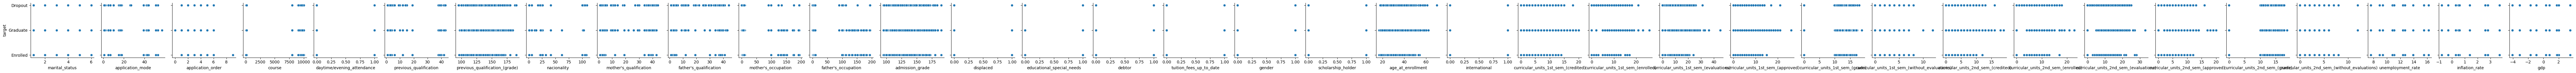

In [7]:
sns.pairplot(df_full, y_vars=['target'])
df=df_full
#Based on these results I doubt anything other than a random forrest will predict anything with accuracy.

Plot the Target data to see the spread.

<Axes: xlabel='target', ylabel='Count'>

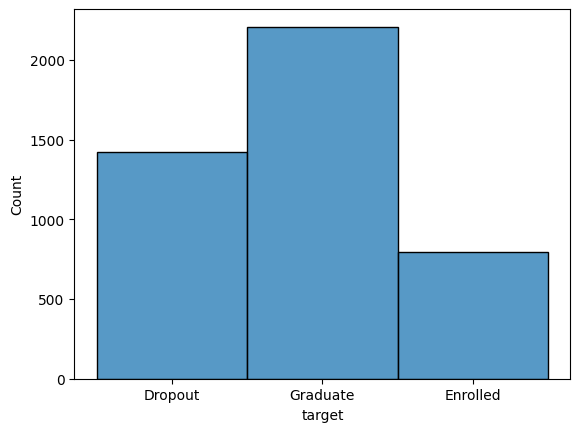

In [8]:
sns.histplot(data=df, x='target')
#lets check the distribution and find the majority class.


In [9]:
#SPLIT MY DATA
target = 'target'


X = df.drop(columns=target)
y = df[target]

#Split the data into a training and testing set, using sklearn
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=.8, random_state=27)

# View our testing data
display(x_test)
print(y_test)

# Assert statement to double-check our work:
assert len(x_train) + len(x_test) == len(X), 'You did not separate the data properly'

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,...,curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp
3256,1,1,2,9500,1,1,140.0,1,38,38,...,0,0,7,7,6,12.766667,0,7.6,2.6,0.32
1964,1,17,1,9085,1,1,131.0,1,1,3,...,1,0,5,10,3,10.333333,0,12.7,3.7,-1.70
1915,1,1,4,9500,1,1,148.0,1,1,37,...,0,0,7,7,6,13.450000,0,7.6,2.6,0.32
3060,1,1,2,9773,1,1,130.0,1,19,19,...,0,0,6,7,6,14.000000,0,15.5,2.8,-4.06
919,6,39,1,8014,0,1,133.1,1,37,1,...,0,0,6,6,6,12.333333,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,1,5,4,9853,1,1,116.0,1,3,38,...,0,0,6,9,3,11.666667,0,9.4,-0.8,-3.12
1424,1,1,2,9130,1,1,140.0,1,19,37,...,1,0,5,5,5,13.400000,0,12.7,3.7,-1.70
4323,1,39,1,9991,0,19,133.1,1,37,37,...,0,0,5,6,0,0.000000,0,12.4,0.5,1.79
1744,1,39,1,9670,1,1,133.1,1,37,37,...,0,0,6,6,0,0.000000,0,12.7,3.7,-1.70


3256    Graduate
1964    Graduate
1915    Graduate
3060    Enrolled
919     Graduate
          ...   
4397    Enrolled
1424    Enrolled
4323     Dropout
1744     Dropout
2472     Dropout
Name: target, Length: 885, dtype: object


In [10]:
# Establish a baseline:
cl_base = round(max(df.target.value_counts(normalize=True)) *100,2)
print(f'Majority class is Graduated {cl_base}% of the time!')




Majority class is Graduated 49.93% of the time!


Creating Pipelines/Models

In [11]:
# Logistic Regression Pipeline:
lr_pipe = make_pipeline(
    SimpleImputer(),
    LogisticRegression(random_state=27)
)

# Fit the pipeline
lr_pipe.fit(x_train, y_train)

# Decision Tree Pipeline:
dt_pipe = make_pipeline(
    SimpleImputer(),
    DecisionTreeClassifier(random_state=27)
)

# Fit the pipeline
dt_pipe.fit(x_train, y_train)

# Random Forest Pipeline:
rf_pipe = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=27)
)

# Fit the pipeline
rf_pipe.fit(x_train, y_train)


# XGBoost Pipeline:
xg_pipe = make_pipeline(
    SimpleImputer(),
    XGBClassifier(objective='binary:logistic')
)

# Fit the pipeline
xg_pipe.fit(x_train,LabelEncoder().fit_transform(y_train))

c:\Users\Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

Checking Metrics( Mean Absolute Error):

In [12]:
print('Logistic Regression:')
print(f'Training Accuracy: {round(lr_pipe.score(x_train, y_train),2)*100}')
print(f'Testing Accuracy: {round(lr_pipe.score(x_test, y_test),2)*100}')
print('--------------------------')
print('Decision Tree Classifier:')
print(f'Training Accuracy: {round(dt_pipe.score(x_train, y_train), 2)*100}')
print(f'Testing Accuracy: {round(dt_pipe.score(x_test, y_test), 2)*100}')
print('--------------------------')
print('Random Forest Classifier:')
print(f'Training Accuracy: {round(rf_pipe.score(x_train, y_train), 2)*100}')
print(f'Testing Accuracy: {round(rf_pipe.score(x_test, y_test), 2) * 100}')
print('--------------------------')
print('XGBoost Classifier:')
print(f'Training Accuracy: {round(xg_pipe.score(x_train, y_train), 2)*100}')
print(f'Testing Accuracy: {round(xg_pipe.score(x_test, y_test), 2) * 100}')

#random forest seems to be the clear winner here.

Logistic Regression:
Training Accuracy: 68.0
Testing Accuracy: 68.0
--------------------------
Decision Tree Classifier:
Training Accuracy: 100.0
Testing Accuracy: 70.0
--------------------------
Random Forest Classifier:
Training Accuracy: 100.0
Testing Accuracy: 78.0
--------------------------
XGBoost Classifier:
Training Accuracy: 0.0
Testing Accuracy: 0.0


Checking Metrics(R2 Scores)

In [13]:
print("Logistic Regression:")
print(f"Training ROC AUC Score: {round(roc_auc_score(y_train, lr_pipe.predict_proba(x_train), multi_class='ovr'),2)*100}")
print(f'Testing ROC AUC Score: {round(roc_auc_score(y_test, lr_pipe.predict_proba(x_test), multi_class="ovr"),2)*100}')
print('------------------------------------')
print('Decision Tree Classifier:')
print(f"Training ROC AUC Score: {round(roc_auc_score(y_train, dt_pipe.predict_proba(x_train), multi_class='ovr'),2)*100}")
print(f'Testing ROC AUC Score: {round(roc_auc_score(y_test, dt_pipe.predict_proba(x_test), multi_class="ovr"),2)*100}')
print('------------------------------------')
print('Random Forest Classifier:')
print(f"Training ROC AUC Score: {round(roc_auc_score(y_train, rf_pipe.predict_proba(x_train), multi_class='ovr'),2)*100}")
print(f'Testing ROC AUC Score: {round(roc_auc_score(y_test, rf_pipe.predict_proba(x_test), multi_class="ovr"),2)*100}')
print('------------------------------------')
print('XGBoost Classifier:')
print(f"Training ROC AUC Score: {round(roc_auc_score(y_train, xg_pipe.predict_proba(x_train), multi_class='ovr'),2)*100}")
print(f'Testing ROC AUC Score: {round(roc_auc_score(y_test, xg_pipe.predict_proba(x_test), multi_class="ovr"),2)*100}')
print('------------------------------------')

#I am surprised how well XGB did here vs. before. But random forest still very strong.

Logistic Regression:
Training ROC AUC Score: 79.0
Testing ROC AUC Score: 77.0
------------------------------------
Decision Tree Classifier:
Training ROC AUC Score: 100.0
Testing ROC AUC Score: 74.0
------------------------------------
Random Forest Classifier:
Training ROC AUC Score: 100.0
Testing ROC AUC Score: 89.0
------------------------------------
XGBoost Classifier:
Training ROC AUC Score: 100.0
Testing ROC AUC Score: 89.0
------------------------------------


Coefficient weights

['marital_status' 'application_mode' 'application_order' 'course'
 'daytime/evening_attendance' 'previous_qualification'
 'previous_qualification_(grade)' 'nacionality' "mother's_qualification"
 "father's_qualification" "mother's_occupation" "father's_occupation"
 'admission_grade' 'displaced' 'educational_special_needs' 'debtor'
 'tuition_fees_up_to_date' 'gender' 'scholarship_holder'
 'age_at_enrollment' 'international' 'curricular_units_1st_sem_(credited)'
 'curricular_units_1st_sem_(enrolled)'
 'curricular_units_1st_sem_(evaluations)'
 'curricular_units_1st_sem_(approved)' 'curricular_units_1st_sem_(grade)'
 'curricular_units_1st_sem_(without_evaluations)'
 'curricular_units_2nd_sem_(credited)'
 'curricular_units_2nd_sem_(enrolled)'
 'curricular_units_2nd_sem_(evaluations)'
 'curricular_units_2nd_sem_(approved)' 'curricular_units_2nd_sem_(grade)'
 'curricular_units_2nd_sem_(without_evaluations)' 'unemployment_rate'
 'inflation_rate' 'gdp']
[[ 7.33940468e-04  7.70476672e-03 -1.40981

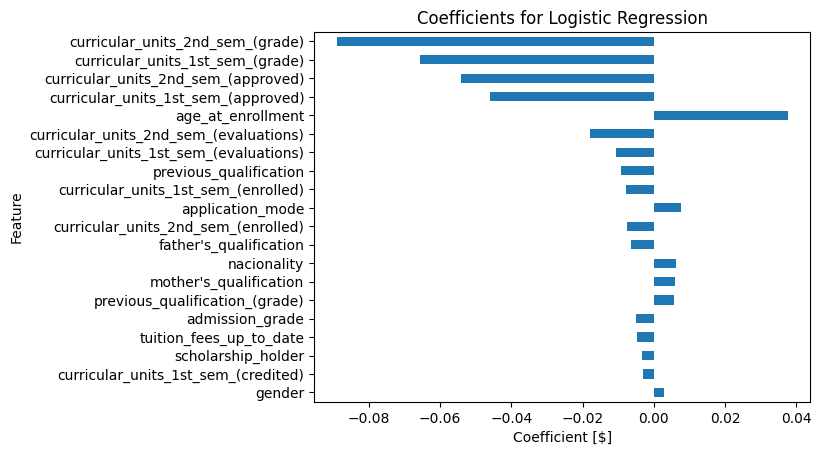

In [14]:
# I know that currently the Random Forrests classifier
#has the best accuracy for predictions. However, I wanted to see
#what the coefficient weights were for the LR to see if cleaning is a valid choice.

coefficients = lr_pipe.named_steps['logisticregression'].coef_
features = lr_pipe.feature_names_in_
print(features)
print(coefficients)
# Coeff sliced for first value in array.
feat_imp = pd.Series(coefficients[0], index=features).sort_values(key=abs)
feat_imp.tail(20).plot(kind='barh')
plt.xlabel('Coefficient [$]')
plt.ylabel('Feature')
plt.title('Coefficients for Logistic Regression');



I tried removing all low impact coefficients to try and impove the score but it had almost no impact and absolutely tanks the accuracy for Random Forrest.

In [15]:
param_grid = {
    'randomforestclassifier__n_estimators': range(50,1000, 10),
    'randomforestclassifier__max_depth' : range(10,110, 10),
    'randomforestclassifier__min_samples_split' : [2,5,10],
    'randomforestclassifier__min_samples_leaf' : [1,2,5]
}

# Step 2: Instantiate the RSCV module with the model object and the param_grid object
clf = RandomizedSearchCV(rf_pipe, param_grid)

# Step 3: Fit the data
clf.fit(x_train, y_train)


RandomizedSearchCV(estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=27))]),
                   param_distributions={'randomforestclassifier__max_depth': range(10, 110, 10),
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     5],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      10],
                                        'randomforestclassifier__n_estimators': range(50, 1000, 10)})

In [16]:
clf.best_score_


0.7767682337240988

In [17]:
clf.best_params_


{'randomforestclassifier__n_estimators': 660,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_depth': 30}

At the current tuning we can only predict the target val 77% of the time. I would need more time to understand and read through the issues to understand fully 
why the test data is much lower versus the train data. 